## Data Loading


We are loading a combined version of the Titanic dataset that has been hosted on GitHub.

For more information about this dataset, consult: https://www.kaggle.com/competitions/titanic/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV

In [ ]:
from pandas import read_csv

data = read_csv("https://raw.githubusercontent.com/prof-rossetti/intro-to-python/main/data/titanic-original-full.csv")
data

,passenger_id,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,False,3,"Braund, Mr. Owen Harris",MALE,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",FEMALE,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,True,3,"Heikkinen, Miss. Laina",FEMALE,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",FEMALE,35.0,1,0,113803,53.1000,C123,Southampton
4,5,False,3,"Allen, Mr. William Henry",MALE,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,True,3,"Spector, Mr. Woolf",MALE,NaN,0,0,A.5. 3236,8.0500,NaN,Southampton
1305,1306,True,1,"Oliva y Ocana, Dona. Fermina",FEMALE,39.0,0,0,PC 17758,108.9000,C105,Cherbourg
1306,1307,True,3,"Saether, Mr. Simon Sivertsen",MALE,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton
1307,1308,True,3,"Ware, Mr. Frederick",MALE,NaN,0,0,359309,8.0500,NaN,Southampton


## Data Cleaning and Exploration

In [ ]:
data_dictionary = data.dtypes.apply(lambda x: str(x)).to_dict()
data_dictionary

{'passenger_id': 'int64',
 'survived': 'bool',
 'pclass': 'int64',
 'name': 'object',
 'gender': 'object',
 'age': 'float64',
 'sibsp': 'int64',
 'parch': 'int64',
 'ticket': 'object',
 'fare': 'float64',
 'cabin': 'object',
 'embarked': 'object'}

In [ ]:
data.describe()

,passenger_id,pclass,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
null_values = data.isnull().sum()
print(null_values)

passenger_id       0
survived           0
pclass             0
name               0
gender             0
age              263
sibsp              0
parch              0
ticket             0
fare               1
cabin           1014
embarked           2
dtype: int64


In [ ]:
data['fare'].fillna(data['fare'].median(), inplace=True)

#data['famonboard'] = data['sibsp'] + data['parch']

mode_embarked = data['embarked'].mode()[0]
data['embarked'].fillna(mode_embarked, inplace=True)

data.drop('cabin', axis=1, inplace=True)

data.drop('ticket', axis=1, inplace=True)

data.drop('name', axis=1, inplace=True)

data = data.dropna(subset=['age'])

In [ ]:
data.head()

,passenger_id,survived,pclass,gender,age,sibsp,parch,fare,embarked
0,1,False,3,MALE,22.0,1,0,7.2500,Southampton
1,2,True,1,FEMALE,38.0,1,0,71.2833,Cherbourg
2,3,True,3,FEMALE,26.0,0,0,7.9250,Southampton
3,4,True,1,FEMALE,35.0,1,0,53.1000,Southampton
4,5,False,3,MALE,35.0,0,0,8.0500,Southampton


In [ ]:
data_dictionary1 = data.dtypes.apply(lambda x: str(x)).to_dict()
data_dictionary1

{'passenger_id': 'int64',
 'survived': 'bool',
 'pclass': 'int64',
 'gender': 'object',
 'age': 'float64',
 'sibsp': 'int64',
 'parch': 'int64',
 'fare': 'float64',
 'embarked': 'object'}

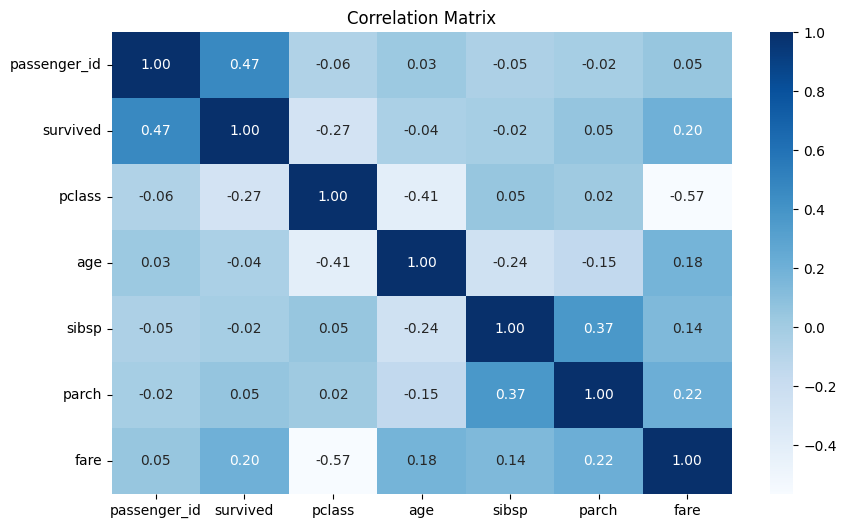

In [ ]:
# Plot distributions and correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

<ipython-input-10-c907b6277845>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['survived'] = data['survived'].astype(int)


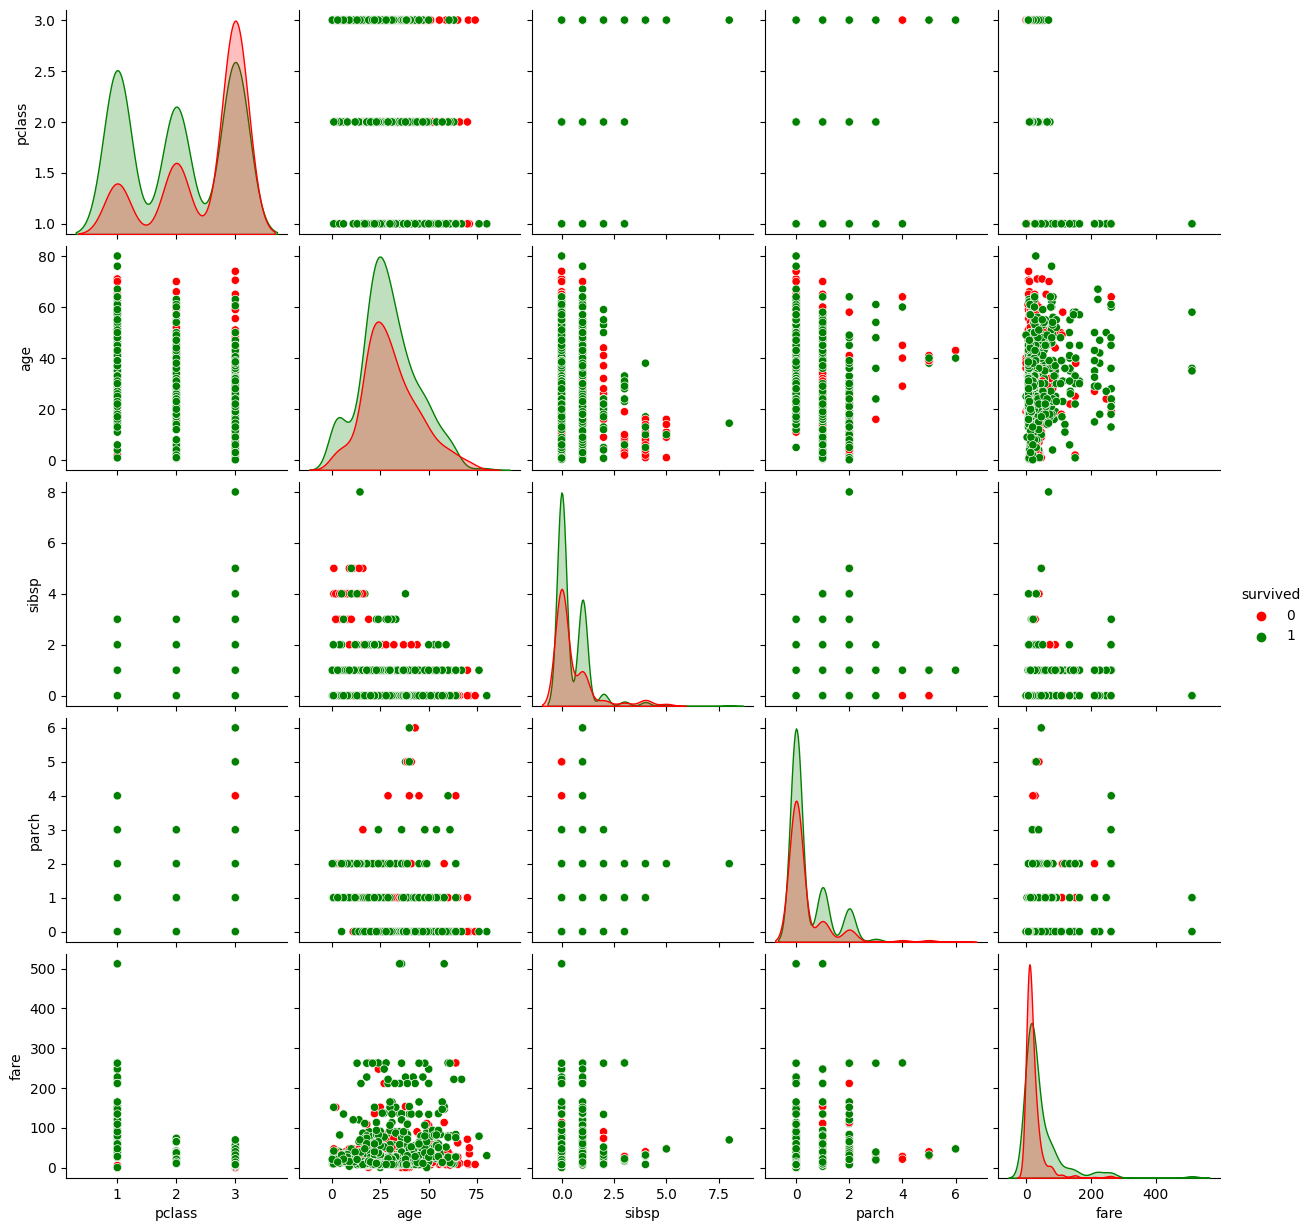

In [ ]:
data['survived'] = data['survived'].astype(int)

# Select numerical columns for pair plot, excluding 'survived'
numerical_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare']

# Define the color palette for the 'survived' column
palette = {1: "green", 0: "red"}

# Create pair plots with the specified color palette for the 'survived' column
sns.pairplot(data, vars=numerical_columns, hue='survived', palette=palette)
plt.show()

In [ ]:
# Set the target variable
target = data[['survived']]
target

,survived
0,0
1,1
2,1
3,1
4,0
...,...
1300,1
1302,1
1303,1
1305,1


In [ ]:
# Select features, dropping the 'passenger_id', 'ticket'
features = data.drop(['survived', 'passenger_id'], axis=1)
features

,pclass,gender,age,sibsp,parch,fare,embarked
0,3,MALE,22.0,1,0,7.2500,Southampton
1,1,FEMALE,38.0,1,0,71.2833,Cherbourg
2,3,FEMALE,26.0,0,0,7.9250,Southampton
3,1,FEMALE,35.0,1,0,53.1000,Southampton
4,3,MALE,35.0,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...
1300,3,FEMALE,3.0,1,1,13.7750,Southampton
1302,1,FEMALE,37.0,1,0,90.0000,Queenstown
1303,3,FEMALE,28.0,0,0,7.7750,Southampton
1305,1,FEMALE,39.0,0,0,108.9000,Cherbourg


In [ ]:
features.head()

,pclass,gender,age,sibsp,parch,fare,embarked
0,3,MALE,22.0,1,0,7.2500,Southampton
1,1,FEMALE,38.0,1,0,71.2833,Cherbourg
2,3,FEMALE,26.0,0,0,7.9250,Southampton
3,1,FEMALE,35.0,1,0,53.1000,Southampton
4,3,MALE,35.0,0,0,8.0500,Southampton


In [ ]:
features.describe()

,pclass,age,sibsp,parch,fare
count,1046.000000,1046.000000,1046.000000,1046.00000,1046.000000
mean,2.207457,29.881138,0.502868,0.42065,36.664826
std,0.841497,14.413493,0.912167,0.83975,55.710102
min,1.000000,0.170000,0.000000,0.00000,0.000000
25%,1.000000,21.000000,0.000000,0.00000,8.050000
50%,2.000000,28.000000,0.000000,0.00000,15.750000
75%,3.000000,39.000000,1.000000,1.00000,35.500000
max,3.000000,80.000000,8.000000,6.00000,512.329200


In [ ]:
train_numerical_features = list(features.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
datastdzd = pd.DataFrame(data = features)
datastdzd[train_numerical_features] = ss_scaler.fit_transform(data[train_numerical_features])

In [ ]:
datastdzd

,pclass,gender,age,sibsp,parch,fare,embarked
0,0.942276,MALE,-0.547050,0.545262,-0.501162,-0.528251,Southampton
1,-1.435579,FEMALE,0.563552,0.545262,-0.501162,0.621701,Cherbourg
2,0.942276,FEMALE,-0.269400,-0.551553,-0.501162,-0.516129,Southampton
3,-1.435579,FEMALE,0.355314,0.545262,-0.501162,0.295154,Southampton
4,0.942276,MALE,0.355314,-0.551553,-0.501162,-0.513884,Southampton
...,...,...,...,...,...,...,...
1300,0.942276,FEMALE,-1.865890,0.545262,0.690237,-0.411070,Southampton
1302,-1.435579,FEMALE,0.494139,0.545262,-0.501162,0.957828,Queenstown
1303,0.942276,FEMALE,-0.130575,-0.551553,-0.501162,-0.518822,Southampton
1305,-1.435579,FEMALE,0.632964,-0.551553,-0.501162,1.297246,Cherbourg


In [ ]:
datastdzd.describe()

,pclass,age,sibsp,parch,fare
count,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03
mean,6.283480e-17,9.849780e-17,7.472247e-17,-1.698238e-18,1.698238e-17
std,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00
min,-1.435579e+00,-2.062328e+00,-5.515530e-01,-5.011624e-01,-6.584509e-01
25%,-1.435579e+00,-6.164631e-01,-5.515530e-01,-5.011624e-01,-5.138837e-01
50%,-2.466513e-01,-1.305747e-01,-5.515530e-01,-5.011624e-01,-3.756021e-01
75%,9.422761e-01,6.329641e-01,5.452615e-01,6.902372e-01,-2.091871e-02
max,9.422761e-01,3.478882e+00,8.222963e+00,6.647235e+00,8.542291e+00


In [ ]:
types = datastdzd.dtypes.apply(lambda x: str(x)).to_dict()
types

{'pclass': 'float64',
 'gender': 'object',
 'age': 'float64',
 'sibsp': 'float64',
 'parch': 'float64',
 'fare': 'float64',
 'embarked': 'object'}

In [ ]:
# Get the list of columns to encode, which are of type 'object'
encode_col_list = list(datastdzd.select_dtypes(include=['object']).columns)

# Perform one-hot encoding on each categorical column
for i in encode_col_list:
    # Create dummy variables for the current column
    dummies = pd.get_dummies(datastdzd[i], prefix=i)
    # Concatenate the dummy variables to the DataFrame
    datastdzd = pd.concat([datastdzd, dummies], axis=1)
    # Drop the original column from the DataFrame
    datastdzd.drop(i, axis=1, inplace=True)

# Display the first few rows of the resulting DataFrame
datastdzd


,pclass,age,sibsp,parch,fare,gender_FEMALE,gender_MALE,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
0,0.942276,-0.547050,0.545262,-0.501162,-0.528251,0,1,0,0,1
1,-1.435579,0.563552,0.545262,-0.501162,0.621701,1,0,1,0,0
2,0.942276,-0.269400,-0.551553,-0.501162,-0.516129,1,0,0,0,1
3,-1.435579,0.355314,0.545262,-0.501162,0.295154,1,0,0,0,1
4,0.942276,0.355314,-0.551553,-0.501162,-0.513884,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1300,0.942276,-1.865890,0.545262,0.690237,-0.411070,1,0,0,0,1
1302,-1.435579,0.494139,0.545262,-0.501162,0.957828,1,0,0,1,0
1303,0.942276,-0.130575,-0.551553,-0.501162,-0.518822,1,0,0,0,1
1305,-1.435579,0.632964,-0.551553,-0.501162,1.297246,1,0,1,0,0


In [ ]:
data_encoded = datastdzd

In [ ]:
data_encoded.head()

,pclass,age,sibsp,parch,fare,gender_FEMALE,gender_MALE,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
0,0.942276,-0.547050,0.545262,-0.501162,-0.528251,0,1,0,0,1
1,-1.435579,0.563552,0.545262,-0.501162,0.621701,1,0,1,0,0
2,0.942276,-0.269400,-0.551553,-0.501162,-0.516129,1,0,0,0,1
3,-1.435579,0.355314,0.545262,-0.501162,0.295154,1,0,0,0,1
4,0.942276,0.355314,-0.551553,-0.501162,-0.513884,0,1,0,0,1


In [ ]:
final_features = data_encoded

In [ ]:
null_values1 = final_features.isnull().sum()
print(null_values1)

pclass                  0
age                     0
sibsp                   0
parch                   0
fare                    0
gender_FEMALE           0
gender_MALE             0
embarked_Cherbourg      0
embarked_Queenstown     0
embarked_Southampton    0
dtype: int64


In [ ]:
final_features.head()

,pclass,age,sibsp,parch,fare,gender_FEMALE,gender_MALE,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
0,0.942276,-0.547050,0.545262,-0.501162,-0.528251,0,1,0,0,1
1,-1.435579,0.563552,0.545262,-0.501162,0.621701,1,0,1,0,0
2,0.942276,-0.269400,-0.551553,-0.501162,-0.516129,1,0,0,0,1
3,-1.435579,0.355314,0.545262,-0.501162,0.295154,1,0,0,0,1
4,0.942276,0.355314,-0.551553,-0.501162,-0.513884,0,1,0,0,1


In [ ]:
final_target = target
final_target.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
# Split the data into train and test sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(final_features, final_target, test_size=0.2, random_state=69)

# You can print the shapes to confirm the split
print(f'Training features shape: {X_train.shape}')
print(f'Test features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Test target shape: {y_test.shape}')


Training features shape: (836, 10)
Test features shape: (210, 10)
Training target shape: (836, 1)
Test target shape: (210, 1)


### Part I (Logistic Regression Benchmark)


In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Convert y_train to a one-dimensional array
y_train = y_train.values.ravel() if hasattr(y_train, "values") else y_train.ravel()

# Train the model using the training data
logreg.fit(X_train, y_train)

# Get the coefficients from the trained model
coefficients = logreg.coef_[0]

# Wrap coefficients in a pandas Series and match them with their corresponding feature names
coefficients_series = pd.Series(coefficients, index=X_train.columns)

# Sort the coefficients in descending order
sorted_coefficients = coefficients_series.sort_values(ascending=False)

# Print the sorted coefficients for interpretation
print(sorted_coefficients)

gender_FEMALE           0.774890
embarked_Cherbourg      0.241539
fare                    0.128379
embarked_Queenstown     0.012531
parch                  -0.110950
sibsp                  -0.211982
embarked_Southampton   -0.253895
age                    -0.430378
pclass                 -0.686399
gender_MALE            -0.774715
dtype: float64



The coefficients from a logistic regression model indicate the relative importance and type of relationship (positive or negative) each feature has with the target variable.

Interpretation:

Gender: Being female (gender_FEMALE) is the most positively associated feature with the target variable, suggesting that females are more likely to have survived (since the target variable in the Titanic dataset is typically survival). Conversely, being male (gender_MALE) has the strongest negative association, indicating males are less likely to have survived.

Embarkation Ports: Passengers who embarked from Cherbourg (embarked_Cherbourg) have a positive coefficient, indicating they are more likely to survive compared to the reference embarkation port. Similarly, Queenstown (embarked_Queenstown) has a small positive association. Passengers from Southampton (embarked_Southampton), however, have a negative association with survival.

Fare: Higher fare (fare) has a positive association with survival chances. This could be because passengers who paid higher fares might have had cabins in more secure areas of the ship or received priority during evacuation.

Family on Board: The number of siblings/spouses (sibsp) and parents/children (parch) aboard have negative coefficients, suggesting that passengers with more family members onboard are less likely to survive. This might be due to larger families trying to stay together or facing more challenges in evacuating quickly.

Passenger Class: The class (pclass) has a negative coefficient, which suggests that passengers in higher classes (lower pclass numbers) are more likely to survive, aligning with historical accounts that higher-class passengers had better access to lifeboats.

The feature with the largest positive coefficient is the most indicative of survival in the model, while the feature with the largest negative coefficient is most indicative of non-survival. These coefficients are key in understanding the model's predictions and can offer insights into feature engineering and model improvement.

In [ ]:
# Make predictions on the test set using the trained model
y_pred = logreg.predict(X_test)

# The probability of each class (useful for understanding the confidence of the predictions)
y_pred_proba = logreg.predict_proba(X_test)

print(y_pred)

# To see the predicted probabilities, you can also print them
# The second column corresponds to the probability of the positive class (survived)
#For a binary classification in logistic regression, predict_proba returns an array with two columns,
# where the first column is the probability of the target being 0, and the second column is the probability of the target being 1.
print(y_pred_proba[:, 1])


[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1
 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1
 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0]
[0.87869363 0.74865256 0.50721528 0.62308697 0.71995574 0.76391962
 0.53700937 0.89757691 0.79856977 0.85194253 0.75228794 0.65071111
 0.74912761 0.40726891 0.86912949 0.74260465 0.49984135 0.94822466
 0.55920342 0.61079062 0.9659469  0.47435895 0.94416041 0.42132813
 0.38617518 0.41879831 0.81526434 0.25109092 0.57472235 0.94304861
 0.59650505 0.85803345 0.35114132 0.82941693 0.22740555 0.80941019
 0.79739528 0.78669419 0.45145005 0.55325224 0.41498496 0.57285975
 0.60412836 0.54585732 0.38582684 0.33055373 0.87342328 0.82979613
 0.80099963 0.74168365 0.7181864  0.3

In [ ]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


# Compute confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
# Printing the confusion matrix
print(conf_matrix)

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # using probability of the positive class
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.67      0.64        78
           1       0.79      0.75      0.77       132

    accuracy                           0.72       210
   macro avg       0.70      0.71      0.70       210
weighted avg       0.73      0.72      0.72       210

Confusion Matrix:
[[52 26]
 [33 99]]
ROC AUC Score: 0.7815656565656566


Classification Report:

For class 0 :

Precision: 0.61 means that when the model predicted an instance to be in class 0, it was correct 61% of the time.

Recall: 0.67 indicates that the model correctly identified 67% of all actual class 0 instances.

F1-score: 0.64 is the harmonic mean of precision and recall for class 0, indicating the balance between precision and recall for this class.

Support: 78 is the number of actual instances of class 0 in the test set.


For class 1 :

Precision: 0.79 suggests that when the model predicted an instance to be in class 1, it was correct 79% of the time.

Recall: 0.75 indicates that the model correctly identified 75% of all actual class 1 instances.

F1-score: 0.77 is the harmonic mean of precision and recall for class 1.

Support: 132 is the number of actual instances of class 1 in the test set.

Accuracy: The overall accuracy is 0.72, meaning that the model correctly predicted the class 72% of the time across all predictions.

Macro Average: The macro average F1-score is 0.70, which is the unweighted mean of the F1-score for both classes, not taking the class imbalance into account.

Weighted Average: The weighted average F1-score is 0.72, which adjusts the F1-score by the support for each class, giving a score that accounts for class imbalance.


Confusion Matrix:

The matrix indicates that there are 52 true negatives and 99 true positives, meaning these many instances were correctly classified for each respective class.

There are 26 false positives (instances incorrectly labeled as class 1) and 33 false negatives (instances incorrectly labeled as class 0).

ROC AUC Score:

The ROC AUC score is approximately 0.782, which is a measure of the model's ability to discriminate between the positive and negative classes. A score closer to 1 indicates a better model, while a score closer to 0.5 suggests no discriminative power. A score of 0.782 indicates that the model has a good discriminative ability.

In summary, the model performs reasonably well, particularly in predicting the positive class (class 1) with higher precision and recall. The ROC AUC score suggests that the model has a good ability to distinguish between the classes. However, there is still room for improvement, especially in reducing the number of false negatives to improve recall for class 0.

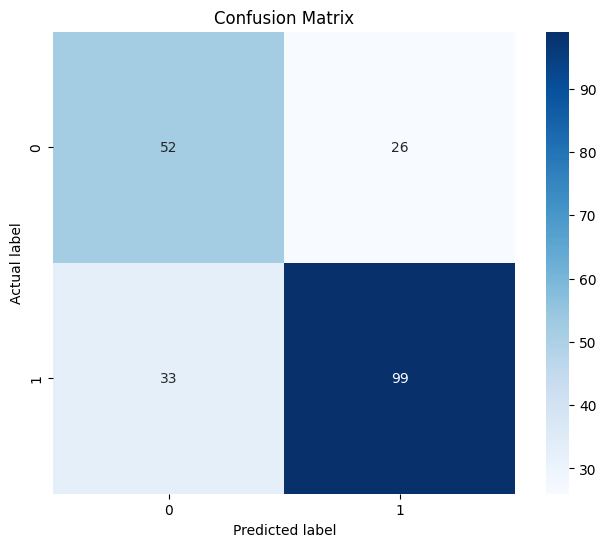

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


### Part II (Random Forest Benchmark)

In [ ]:
# Initialize the RandomForestClassifier with default parameters
rf_model = RandomForestClassifier(random_state=69)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=69)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

In [ ]:
# Evaluate the model
class_report = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

In [ ]:
# Display results
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)
print(f"ROC AUC Score: {roc_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.69      0.64        78
           1       0.80      0.71      0.75       132

    accuracy                           0.70       210
   macro avg       0.69      0.70      0.69       210
weighted avg       0.72      0.70      0.71       210

Confusion Matrix:
[[54 24]
 [38 94]]
ROC AUC Score: 0.7640


Classification Report:

For class 0:

Precision: 0.59, meaning that 59% of the instances predicted as class 0 are actually class 0.

Recall: 0.69, indicating that the model correctly identified 69% of all actual instances of class 0.

F1-score: 0.64, the harmonic mean of precision and recall for class 0.
Support: 78, the actual number of occurrences of class 0 in the test set.

For class 1:

Precision: 0.80, meaning that 80% of the instances predicted as class 1 are actually class 1.

Recall: 0.71, indicating that the model correctly identified 71% of all actual instances of class 1.

F1-score: 0.75, the harmonic mean of precision and recall for class 1.

Support: 132, the actual number of occurrences of class 1 in the test set.

The overall accuracy of the model is 0.70, meaning it correctly predicted the class for 70% of the cases in the test set. The macro average and weighted average F1-scores are 0.69 and 0.71, respectively.


Confusion Matrix:

The matrix shows 54 true negatives and 94 true positives, indicating correct predictions for non-survival and survival, respectively.

There are 24 false positives (non-survival instances incorrectly labeled as survival) and 38 false negatives (survival instances incorrectly labeled as non-survival).

ROC AUC Score:

The ROC AUC score is 0.7640, which is a measure of the model's ability to distinguish between classes. A score of 1 represents a perfect model, and a score of 0.5 represents a model that performs no better than random chance. A score of 0.7640 indicates that the model has a good discriminative ability between the positive and negative classes.

In summary, the model has a good predictive ability, particularly for predicting survival (class 1), as indicated by the higher precision and F1-score for class 1. The ROC AUC score further supports the model's effectiveness. However, the model could potentially be improved to reduce the number of false negatives and false positives, thereby increasing its precision and recall for non-survival (class 0).

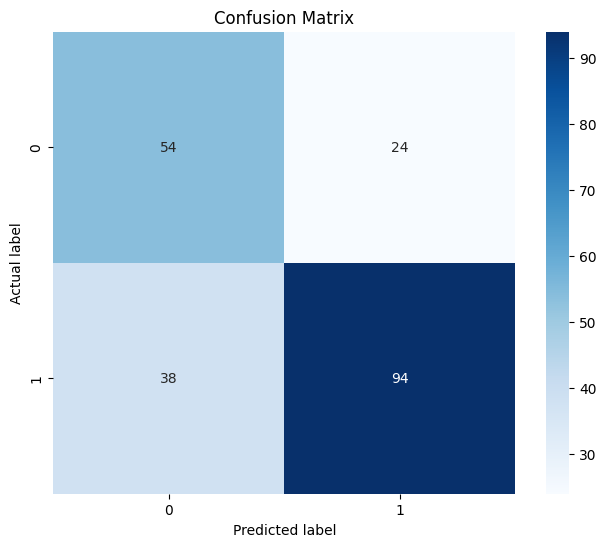

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Part III (Best Model)

In [ ]:
best_features = final_features
best_features['famonaboard'] = best_features['sibsp'] + best_features['parch']
best_features['pclass*age'] = best_features['pclass'] * best_features['age']
best_features['pclass*fare'] = best_features['pclass'] * best_features['fare']

In [ ]:
best_features.head()

,pclass,age,sibsp,parch,fare,gender_FEMALE,gender_MALE,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton,famonaboard,pclass*age,pclass*fare
0,0.942276,-0.547050,0.545262,-0.501162,-0.528251,0,1,0,0,1,0.044099,-0.515473,-0.497758
1,-1.435579,0.563552,0.545262,-0.501162,0.621701,1,0,1,0,0,0.044099,-0.809023,-0.892501
2,0.942276,-0.269400,-0.551553,-0.501162,-0.516129,1,0,0,0,1,-1.052715,-0.253849,-0.486336
3,-1.435579,0.355314,0.545262,-0.501162,0.295154,1,0,0,0,1,0.044099,-0.510081,-0.423716
4,0.942276,0.355314,-0.551553,-0.501162,-0.513884,0,1,0,0,1,-1.052715,0.334804,-0.484220


In [ ]:
best_target = final_target
best_target.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
X1_train, X1_test, y1train, y1test = train_test_split(best_features, best_target, test_size=0.2, random_state=69)
y1_train = y1train.values.ravel()
y1_test = y1test.values.ravel()


In [ ]:
# Define a parameter grid to search over
param_grid_lr = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear']  # Solver that supports L1 regularization
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search_lr.fit(X1_train, y1_train)

# Best Logistic Regression model
best_lr_model = grid_search_lr.best_estimator_



In [ ]:

# Predict with the best Logistic Regression model
y_pred_lr = best_lr_model.predict(X1_test)


# Generate classification reports
report_lr = classification_report(y1_test, y_pred_lr)

# Generate confusion matrices
matrix_lr = confusion_matrix(y1_test, y_pred_lr)


# Print the classification reports
print("Classification Report for Logistic Regression:")
print(report_lr)


# Print the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(matrix_lr)

# Predict the probability of the positive class for Logistic Regression
y_pred_proba_lr = best_lr_model.predict_proba(X1_test)[:, 1]  # Probability for class 1

# Calculate ROC AUC scores
roc_auc_lr = roc_auc_score(y1_test, y_pred_proba_lr)

# Print ROC AUC scores
print(f"ROC AUC Score for Logistic Regression: {roc_auc_lr:.4f}")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        78
           1       0.79      0.75      0.77       132

    accuracy                           0.71       210
   macro avg       0.70      0.70      0.70       210
weighted avg       0.72      0.71      0.72       210

Confusion Matrix for Logistic Regression:
[[51 27]
 [33 99]]
ROC AUC Score for Logistic Regression: 0.7817


In [ ]:
# Define a parameter grid to search over
param_grid_rf = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}


# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search_rf.fit(X1_train, y1_train)

# Best Random Forest model
best_rf_model = grid_search_rf.best_estimator_


In [ ]:
# Predict with the best Random Forest model
y_pred_rf = best_rf_model.predict(X1_test)

report_rf = classification_report(y1_test, y_pred_rf)

matrix_rf = confusion_matrix(y1_test, y_pred_rf)

print("Classification Report for Random Forest:")
print(report_rf)

print("Confusion Matrix for Random Forest:")
print(matrix_rf)

# Predict the probability of the positive class for Random Forest
y_pred_proba_rf = best_rf_model.predict_proba(X1_test)[:, 1]  # Probability for class 1

# Calculate ROC AUC scores
roc_auc_rf = roc_auc_score(y1_test, y_pred_proba_rf)

# Print ROC AUC scores
print(f"ROC AUC Score for Random Forest: {roc_auc_rf:.4f}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.60      0.79      0.68        78
           1       0.85      0.68      0.76       132

    accuracy                           0.72       210
   macro avg       0.72      0.74      0.72       210
weighted avg       0.76      0.72      0.73       210

Confusion Matrix for Random Forest:
[[62 16]
 [42 90]]
ROC AUC Score for Random Forest: 0.7970


In [ ]:
# Decide which model performs better
if roc_auc_lr > roc_auc_rf:
    best_model_params = best_lr_model.get_params()
    print("Logistic Regression performs better.")
    print("Parameters of the best model:", best_model_params)

elif roc_auc_lr < roc_auc_rf:
    print("Random Forest performs better.")
    best_model_params = best_rf_model.get_params()
    print("Parameters of the best model:", best_model_params)

else:
    print("Both models have the same performance.")


Random Forest performs better.
Parameters of the best model: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 69, 'verbose': 0, 'warm_start': False}
